In [119]:
import os 
os.chdir('/Users/ngdnhtien/Research/Codespace/PulsatingPulseShop/simulation')
import qutip as qt 
import numpy as np
import matplotlib.pyplot as plt
import datetime

%config InlineBackend.figure_formats = ['svg']
today = datetime.datetime.now()

print(today)

2024-06-14 21:14:49.713003


In [120]:
ket0 = qt.basis(2, 0)
ket1 = qt.basis(2, 1)

X = ket0 * ket1.dag() + ket1 * ket0.dag()
Y = -1j* ket0 * ket1.dag() + 1j * ket1 * ket0.dag()
Z = ket0 * ket0.dag() - ket1 * ket1.dag()

In [121]:
omega_q = 10
Omega_0 = 1
omega_d = omega_q
phi = 0

args={'Omega_0': Omega_0, 'omega_d': omega_d, 'phi': phi}

In [122]:
H0 = (omega_q/2)*(ket0*ket0.dag()-ket1*ket1.dag())

def H_eff(t, args):
    Omega_0 = args['Omega_0']
    omega_d = args['omega_d']
    phi = args['phi']

    return Omega_0*np.cos(omega_d*t+phi)

H = [H0, [ket1*ket0.dag()+ket0*ket1.dag(), H_eff]]

psi0 = ket0 
times = np.arange(0, 5, 0.001)

res = qt.sesolve(H, psi0, times, [X, Y, Z], args=args)

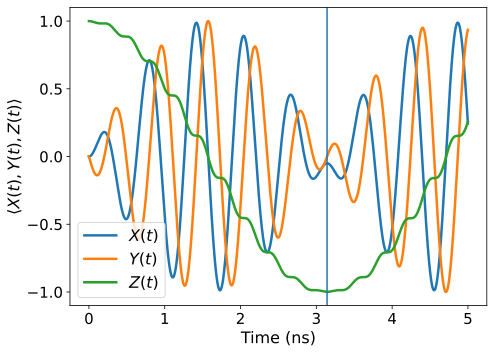

In [123]:
fig, ax = plt.subplots(figsize=(7,5))
linewidth_val = 2.5
ax.plot(times, res.expect[0], label='$X(t)$', linewidth=linewidth_val)
ax.plot(times, res.expect[1], label='$Y(t)$', linewidth=linewidth_val)
ax.plot(times, res.expect[2], label='$Z(t)$', linewidth=linewidth_val)
ax.axvline(np.pi)
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.yaxis.set_ticks(np.arange(-1, 1+0.5, 0.5))
ax.set_xlabel('Time (ns)', fontsize=16)
ax.set_ylabel(r'$\langle X(t), Y(t), Z(t) \rangle$', fontsize=16)
fig.tight_layout()
fig.savefig('./driven_twolevel.png', dpi=300)

In [126]:
omega_q = 10
Omega_0 = 1
omega_d = omega_q-0.02
theta = 0

args={'Omega_0': Omega_0, 'omega_d': omega_d, 'theta': theta}

H = (omega_q-omega_d)*Z/2 + (args['Omega_0']/2)*(np.cos(theta)*X+np.sin(theta)*Y)

In [128]:
psi0 = ket0 
times = np.arange(0, 5, 0.001)

res = qt.sesolve(H, psi0, times, [X, Y, Z], args=args)

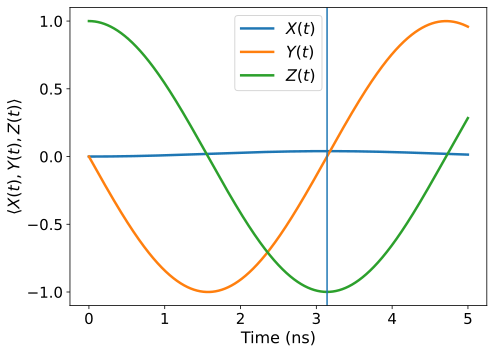

In [129]:
fig, ax = plt.subplots(figsize=(7,5))
linewidth_val = 2.5
ax.plot(times, res.expect[0], label='$X(t)$', linewidth=linewidth_val)
ax.plot(times, res.expect[1], label='$Y(t)$', linewidth=linewidth_val)
ax.plot(times, res.expect[2], label='$Z(t)$', linewidth=linewidth_val)
ax.axvline(np.pi)
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.yaxis.set_ticks(np.arange(-1, 1+0.5, 0.5))
ax.set_xlabel('Time (ns)', fontsize=16)
ax.set_ylabel(r'$\langle X(t), Y(t), Z(t) \rangle$', fontsize=16)
fig.tight_layout()
fig.savefig('./driven_twolevel_drive_frame.png', dpi=300)